<a href="https://colab.research.google.com/github/victoriamaina/A-Research-on-factors-affecting-house-pricing-on-the-real-estate./blob/main/Hass_consulting_company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Research on factors affecting house pricing on the real estate.**

By
 Victoria Maina



## **1. Defining the Question**

### a) Specifying the Question

The research problem is to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months.

To create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

### b) Defining the Metric for Success

This analysis requires us to come up with  a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. Our findings will be used by  real estate companies to be able to determine pricing of different houses depending on their characteristics..we will implement the solution by analysing our data and providing  insights that arise.


### c) Understanding the context 

>  You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.


### d) Recording the Experimental Design

> The following steps were taken:

Business Understanding

Reading the data

Checking our data

Data cleaning

Performing EDA

Feature Engineering

Linear Regression

Ridge Regression

Lasso Regression 

Elastic Regression

Plotting residual plots

Assess their heteroscedasticity using Barlette's test

Challenging the solution

Conclusion

### e) Data Relevance

Datasets Provided:

house pricing factors [Link](http://bit.ly/IndependentProjectWeek7Dataset)

## **2. Reading the Data**

In [1]:
# Importing the libraries we will need 

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import scipy.stats

from scipy import stats

### Reading the Dataset from our CSV file

In [2]:
#loading the dataset
df=pd.read_csv("/content/Independent Project Week 7 - house_data.csv")
#previewing the dataset
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#checking the tail
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


## **3. Data Understanding**

In [4]:
#getting the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

Our dataset comprises of Float and integer data types.

In [5]:
#checking the columns
#
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

We have 20 columns as shown above.

In [6]:
#Getting the shape
#
df.shape

(21613, 20)

There are 21,613 records and 20 variables.

In [7]:
#getting basic statistical details
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The count,mean,std,min,max and quartiles are shown above.

In [8]:
#getting the number unique values in each column
df.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

These are the number of unique values in each column.

In [9]:
#checking for missing values
df.isnull().sum().sum()

0

There are 0 missing values.

## **4. Data Cleaning**

> This done by following the data integrity rules i.e Validity, Accuracy, Completeness, Consistency, Uniformity to ensure the data is ready for analysis

### 4.1 Completeness

In [10]:
#checking for null values across each column
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

the dataset has no null values.

In [11]:
#Checking for the percentage of the missing values
df.isna().mean().round(4) * 100

id               0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

### 4.2 Validity

In [12]:
#Irrelevant Data
#Drop columns we do not need.
#

df=df.drop(['id','waterfront','view','grade','condition','yr_renovated','sqft_basement','sqft_living15','sqft_lot15',], axis = 1)

The  columns which aren't  necessary for our analysis are dropped.

In [13]:
# Replacing spaces in the column names with underscore
df.columns= df.columns.str.replace(" ", "_")

To make our columns look neater.

In [14]:
# Changing column names to lower case
df.columns= df.columns.str.lower()


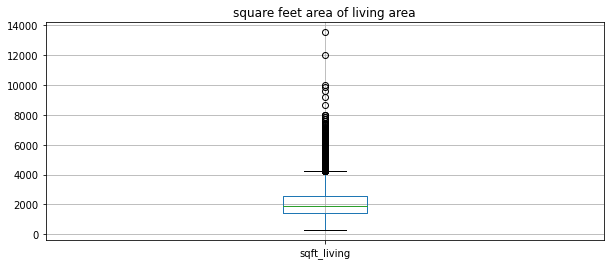

In [15]:
#checking outliers
plt.figure(figsize=(10, 4))
df.boxplot(['sqft_living'])
plt.title('square feet area of living area')
plt.show()

There are existing outliers but they won't be dropped as they are true values to the data,i.e, represent real time data.

### 4.3 Consistency

In [16]:
#checking for duplicates
df.duplicated().sum()

5

There are 5 duplicates.

In [17]:
##Dropping the duplicates
df1=df.drop_duplicates(keep=False)

In [18]:
df1.duplicated().sum()

0

After dropping the duplicates there are 0 

### 4.4 Uniformity

In [19]:
#no action was done

### 4.5 Accuracy

In [20]:
#no action was done

# Exporting our new Dataset

In [21]:
# Let's export our dataframe into a csv file as shown 
# we use the to_csv function to create a csv file and export it

df.to_csv('/content/Independent Project Week 7 - house_data.csv')
df2 = pd.read_csv('/content/Independent Project Week 7 - house_data.csv', index_col=0)
df2.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,zipcode,lat,long
0,221900.0,3,1.00,1180,5650,1.0,1180,1955,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,2170,1951,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,770,1933,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,1050,1965,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,1680,1987,98074,47.6168,-122.045


## **5. Exploratory Data Analysis**

### Univariate Analysis

#### Measures of central Tendacies

In [22]:
from numpy.ma.core import append
numerical_columns=['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','lat','long','yr_built','zipcode']
for column in numerical_columns:
  print('\n')
  print(column + ', Mean: '+ str(df2[column].mean()))
  print(column + ', Mode:' + str(df2[column].mode()))
  print(column + ', Median: ' + str(df2[column].median()))



price, Mean: 540182.1587933188
price, Mode:0    350000.0
1    450000.0
dtype: float64
price, Median: 450000.0


bedrooms, Mean: 3.37084162309721
bedrooms, Mode:0    3
dtype: int64
bedrooms, Median: 3.0


bathrooms, Mean: 2.1147573219821405
bathrooms, Mode:0    2.5
dtype: float64
bathrooms, Median: 2.25


sqft_living, Mean: 2079.8997362698374
sqft_living, Mode:0    1300
dtype: int64
sqft_living, Median: 1910.0


sqft_lot, Mean: 15106.967565816869
sqft_lot, Mode:0    5000
dtype: int64
sqft_lot, Median: 7618.0


floors, Mean: 1.4943089807060566
floors, Mode:0    1.0
dtype: float64
floors, Median: 1.5


sqft_above, Mean: 1788.3906907879516
sqft_above, Mode:0    1300
dtype: int64
sqft_above, Median: 1560.0


lat, Mean: 47.56005251931704
lat, Mode:0    47.5322
1    47.5491
2    47.6624
3    47.6846
dtype: float64
lat, Median: 47.5718


long, Mean: -122.21389640494083
long, Mode:0   -122.29
dtype: float64
long, Median: -122.23


yr_built, Mean: 1971.0051357978994
yr_built, Mode:0    2014
dt

#### Measures of dispersion

In [23]:
numerical_columns=['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','lat','yr_built','long','zipcode']
for column in numerical_columns:
  print('\n')
  print(column + ', Standard deviation: ' + str(df2[column].std()))
  print(column + ', Variance: ' + str(df2[column].var()))
  print(column + ', Skewness: ' + str(df2[column].skew()))
  print(column + ', Kurtosis: ' + str(df2[column].kurt()))
  print(column + ', Quartiles: ' + str(df2[column].quantile([0.25,0.5,0.75])))



price, Standard deviation: 367362.23171800975
price, Variance: 134955009292.83669
price, Skewness: 4.021715573048684
price, Kurtosis: 34.522444410072566
price, Quartiles: 0.25    321950.0
0.50    450000.0
0.75    645000.0
Name: price, dtype: float64


bedrooms, Standard deviation: 0.9300618311474632
bedrooms, Variance: 0.8650150097573724
bedrooms, Skewness: 1.97429953543601
bedrooms, Kurtosis: 49.06365318170099
bedrooms, Quartiles: 0.25    3.0
0.50    3.0
0.75    4.0
Name: bedrooms, dtype: float64


bathrooms, Standard deviation: 0.7701631572177287
bathrooms, Variance: 0.5931512887355798
bathrooms, Skewness: 0.5111075733474171
bathrooms, Kurtosis: 1.2799024441754554
bathrooms, Quartiles: 0.25    1.75
0.50    2.25
0.75    2.50
Name: bathrooms, dtype: float64


sqft_living, Standard deviation: 918.4408970468115
sqft_living, Variance: 843533.6813681519
sqft_living, Skewness: 1.471555426802092
sqft_living, Kurtosis: 5.24309298981711
sqft_living, Quartiles: 0.25    1427.0
0.50    1910.0
0

#### Histograms

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


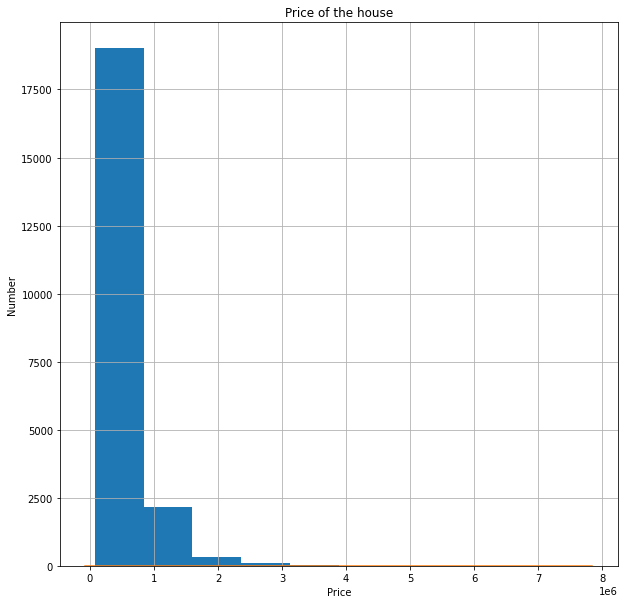

In [24]:
#plotting the histogram for the enrollment column
#
plt.figure(figsize = (10,10))
df2['price'].hist()
sns.distplot(df2['price'])
plt.title('Price of the house')
plt.xlabel('Price')
plt.ylabel('Number')
plt.show()

#### Bar Graphs

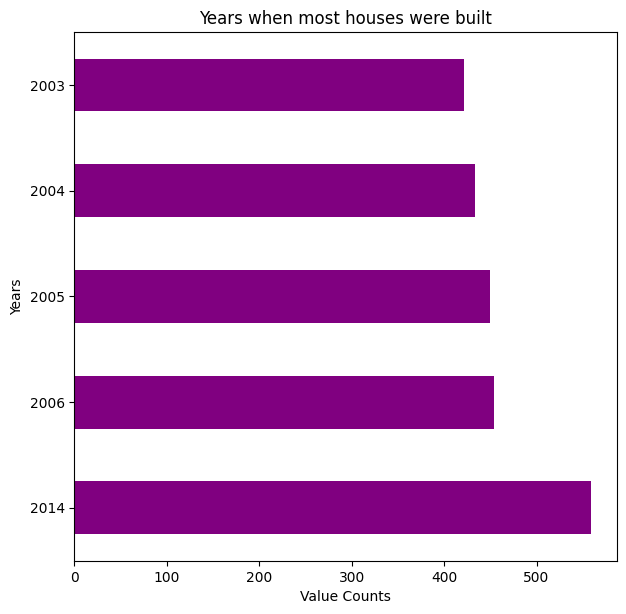

In [25]:
#creating a bar graph of the years with the largest records
#
plt.figure(figsize = (7,7), dpi = 100)
df2.yr_built.value_counts().head()
df2.yr_built.value_counts().head().plot(kind= 'barh',color='Purple')
plt.title('Years when most houses were built')
plt.xlabel('Value Counts')
plt.ylabel('Years')
plt.show()

The year 2014 had the most houses built.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


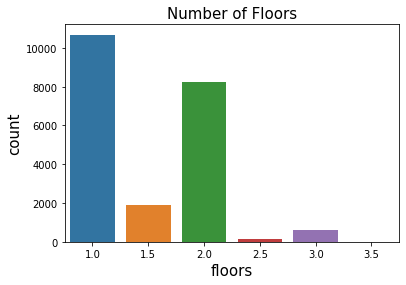

In [26]:

#creating a bar graph of the years with the largest records
#
sns.countplot(df2['floors'])
plt.title('Number of Floors',fontsize=15)
plt.xlabel("floors",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.show()

the bar graph shows houses with one floor are most followed by those of that have two floors.

### Bivariate Analysis

#### Heat Map

In [27]:
#this is a summary analysis of the correlation coefficients in the datasets

corr = df2.corr()

corr.style.background_gradient(cmap='coolwarm')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,zipcode,lat,long
price,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.605566,0.053982,-0.053168,0.306919,0.021571
bedrooms,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,0.477600,0.154178,-0.152668,-0.008931,0.129473
bathrooms,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.685342,0.506019,-0.203866,0.024573,0.223042
sqft_living,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.876597,0.318049,-0.199430,0.052529,0.240223
sqft_lot,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.183512,0.053080,-0.129574,-0.085683,0.229521
floors,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.523885,0.489319,-0.059121,0.049614,0.125419
sqft_above,0.605566,0.477600,0.685342,0.876597,0.183512,0.523885,1.000000,0.423898,-0.261190,-0.000816,0.343803
yr_built,0.053982,0.154178,0.506019,0.318049,0.053080,0.489319,0.423898,1.000000,-0.346869,-0.148122,0.409356
zipcode,-0.053168,-0.152668,-0.203866,-0.199430,-0.129574,-0.059121,-0.261190,-0.346869,1.000000,0.267048,-0.564072
lat,0.306919,-0.008931,0.024573,0.052529,-0.085683,0.049614,-0.000816,-0.148122,0.267048,1.000000,-0.135512


1. sqft_living and price

correlation coefficient = 0.702089, which is greater than 0 and closer to 1 indicating a strong  relationship between the two variables.

2. sqft_above and pricing

correlation coefficient = 0.605624, which is closer to 1 indicating a positive relationship between the two variables

3. bathroom and pricing 

correlation coefficient =0.525195, which is also closer than 1 thus there is a positive relation between the two variables.

4. No of floors and pricing

correlation coefficient = 0.257082,which more than 0 thus there is a small  relation between the two variables.

5. Zipcode and pricing 
the correlation cofficient between the two is -0.053125 ,thus there is no relation between the two.

#### Scatter Plots

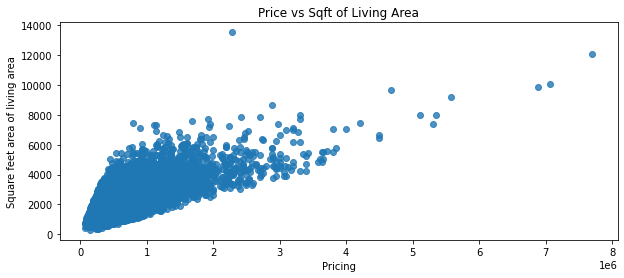

In [28]:
#scatter plot to show sponser verses enrollment
plt.figure(figsize=(10, 4))
sns.regplot(x = df2["price"], y = df2["sqft_living"], fit_reg=False)
plt.title('Price vs Sqft of Living Area')
plt.xlabel('Pricing')
plt.ylabel('Square feet area of living area')
plt.show()

There is relation between squarefeet of area living  and price since the dots are concentrated into one area  over the graph.

### Multivariate Analysis

#### Linear Discriminant Analysis (LDA)

In [29]:
# Divide the dataset into features and corresponding labels.
x= df2.drop(["price"],1)
y = df2["price"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [30]:
#checking for unique values of the target variable
y.unique()

array([221900., 538000., 180000., ..., 541800., 610685., 402101.])

In [31]:
#import Linear Discriminant Analysismethod from sklearn library
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [32]:
#create an instance of LDA and train the model
lda= LDA()

lda_= lda.fit(x, y)
lda_feat = lda_. transform(x)

#displaying the coefficients of the reducted columns
lda.coef_

array([[-1.55895101e+00, -6.83427499e+00,  4.81393851e-04, ...,
         1.49560297e-02, -3.54677984e+01,  2.49757066e+01],
       [-5.22785893e-01, -8.80648418e-01, -3.80494273e-03, ...,
         4.82861973e-02, -1.96409773e+01,  8.73964938e+00],
       [-2.44640912e+00,  5.02110246e-01, -1.07927534e-03, ...,
        -1.82420466e-02,  3.06244792e-01,  2.92582683e+01],
       ...,
       [-7.20909015e+00,  1.34976768e+01,  1.33403995e-02, ...,
        -3.73011094e-02,  5.45714609e+01, -3.77047589e+01],
       [-7.90985005e+00, -3.53713281e+00,  3.40553565e-02, ...,
        -7.70755934e-02,  5.25712048e+01, -2.88198428e+01],
       [-1.06734954e+01,  1.10380830e+01,  3.76934392e-02, ...,
        -4.35846897e-02,  5.95065948e+01, -2.46676018e+01]])

In [33]:
#coeeficients are in array thus we need a new dataframe to get the column names
feature_importance = pd.DataFrame(index=x.columns.values, data=lda_.coef_[0].T)
feature_importance.sort_values(0, ascending= False)

,0
long,24.975707
floors,1.373582
yr_built,0.045738
zipcode,0.014956
sqft_living,0.000481
sqft_lot,-0.000005
sqft_above,-0.004337
bedrooms,-1.558951
bathrooms,-6.834275
lat,-35.467798


In [34]:
# using the correlation coefficients o compute the VIF score for each variable we have:
pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,zipcode,lat,long
price,2.608549,0.407088,-0.339615,-1.691556,0.004304,-0.070397,-0.289911,0.523703,0.247953,-0.641540,0.319184
bedrooms,0.407088,1.648008,-0.477758,-1.025196,0.112291,0.061254,0.048819,0.256782,0.121134,-0.026901,0.040010
bathrooms,-0.339615,-0.477758,3.299061,-2.141518,0.022154,-0.703753,0.782974,-0.888853,0.028709,0.035848,0.046696
sqft_living,-1.691556,-1.025196,-2.141518,8.372275,-0.171438,1.352168,-5.183007,0.098503,-0.236274,0.132371,0.131690
sqft_lot,0.004304,0.112291,0.022154,-0.171438,1.100991,0.086918,-0.128415,0.078362,-0.024500,0.084738,-0.232256
floors,-0.070397,0.061254,-0.703753,1.352168,0.086918,1.962410,-1.635605,-0.523045,-0.201480,-0.118536,0.206384
sqft_above,-0.289911,0.048819,0.782974,-5.183007,-0.128415,-1.635605,6.434271,-0.300583,0.134677,0.245904,-0.674800
yr_built,0.523703,0.256782,-0.888853,0.098503,0.078362,-0.523045,-0.300583,1.984138,0.268205,0.062581,-0.371451
zipcode,0.247953,0.121134,0.028709,-0.236274,-0.024500,-0.201480,0.134677,0.268205,1.636133,-0.346803,0.780022
lat,-0.641540,-0.026901,0.035848,0.132371,0.084738,-0.118536,0.245904,0.062581,-0.346803,1.282499,-0.159044


In [35]:
# residual plots and heteroskedasticity testing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df2.values
y = df2['price'].values

X_train, X_test, price_train, price_test = train_test_split(X, y, test_size=0.4, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, price_train)

# This is our prediction for admission based on our model
price_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(price_predict, price_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()


-4.4366005715909115e-11

**Residual plots**

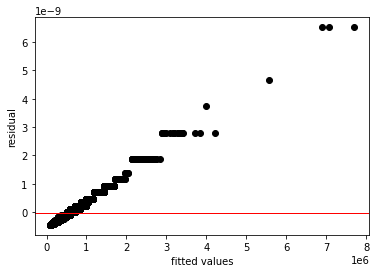

In [36]:
import matplotlib.pyplot as plt

plt.scatter(price_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [37]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(price_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(price_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


inf
the variances are homogeneous!


**Multiple Linear Regression**

In [38]:
#separating independent and dependent variable
#X = df1.iloc[:,1:].values
#y = df1.iloc[:,0].values
X = df2.iloc[:,1:-1].values
y = df2.iloc[:,-1] .values

In [39]:
##splitting dataset into training and testing dataset
#Train using 80% of the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [40]:
# Fitting Multiple Linear Regression to the Training set
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# Creating a baseline regression model
first_model = (mean_squared_error(y_true=y,y_pred=regressor.predict(X)))
print(first_model)


0.011419737789382076


In [41]:
# regression coefficient
regressor.intercept_


-14.315811969627063

In [42]:
# regression coeefficient
regressor.coef_

array([ 9.24174611e-04, -8.56968949e-03, -3.03684341e-05,  4.48408046e-07,
       -3.33290344e-02,  6.28254439e-05,  1.20001160e-03, -1.14579278e-03,
        4.46258343e-02])

In [43]:
# comparing the predicted and actual data
#We can compare y_pred and y_test to find its accuracy
y_pred = regressor.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame.describe()


,Actual,Predicted
count,4323.000000,4323.000000
mean,-122.212719,-122.213313
std,0.141170,0.091596
min,-122.519000,-122.461719
25%,-122.327000,-122.296347
50%,-122.226000,-122.189007
75%,-122.126000,-122.142175
max,-121.316000,-121.688073


In [44]:
# Predicting the Test set results
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.07903389171773763
Mean Squared Error: 0.011915216287241247
Root Mean Squared Error: 0.109156842603848


In [45]:
# root mean squared error for X-train
rmse=np.sqrt(mean_squared_error(y_train,regressor.predict(X_train)))
rmse

0.10628195442523201

In [46]:
# regressor score
regressor.score(X_train,y_train)


0.42973671260015023

In [47]:
# cross validation
from sklearn.model_selection import cross_val_score
np.sqrt(-cross_val_score(regressor,X_test,y_test,cv=10,scoring="neg_mean_squared_error")).mean()


0.109151250611254

**Quantile Regression**

In [48]:
#Importing libraries 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [49]:
#  base model
print(first_model)

0.011419737789382076


In [50]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('price ~ bedrooms', df2)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:              0.04634
Model:                       QuantReg   Bandwidth:                   4.011e+04
Method:                 Least Squares   Sparsity:                    5.565e+05
Date:                Sun, 13 Feb 2022   No. Observations:                21613
Time:                        22:58:42   Df Residuals:                    21611
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     1.8e+05   7116.256     25.294      0.000    1.66e+05    1.94e+05
bedrooms      8.5e+04   2035.082     41.767      0.000     8.1e+04     8.9e+04


These are the parameters for the 0.5th quantile of our y. 

In [51]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('price ~ sqft_living', df2)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2480
Model:                       QuantReg   Bandwidth:                   3.150e+04
Method:                 Least Squares   Sparsity:                    4.835e+05
Date:                Sun, 13 Feb 2022   No. Observations:                21613
Time:                        22:58:42   Df Residuals:                    21611
                                        Df Model:                            1
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     5.27e+04   4070.801     12.945      0.000    4.47e+04    6.07e+04
sqft_living   216.7401      1.790    121.055      0.000     213.231     220.249

The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical proble

The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity between sqft living and price.


In [52]:
['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','lat','yr_built','long','zipcode']

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'lat',
 'yr_built',
 'long',
 'zipcode']

## **7. Ridge Regression**

In [53]:
#importing libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [54]:
# installing !pip install pydataset and importing pydataset so as to use a dataset from the package
# 
!pip install pydataset
from pydataset import data

     |████████████████████████████████| 15.9 MB 9.0 MB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939432 sha256=57cb1d311e6768228976b9a183e94fd862798d4fdca3df87a4e89968578265e2
  Stored in directory: /root/.cache/pip/wheels/32/26/30/d71562a19eed948eaada9a61b4d722fa358657a3bfb5d151e2
Successfully built pydataset
initiated datasets repo at: /root/.pydataset/


In [55]:
# Setting up our X and y datasets
#
X = df2.iloc[:,1:-1].values
y = df2.iloc[:,-1] .values


In [56]:
# In order to create our ridge model we need to first determine the most appropriate value for the l2 regularization. 
# L2 is the name of the hyperparameter that is used in ridge regression. 
# Determining the value of a hyperparameter requires the use of a grid. 
# In the code below, we first create our ridge model and indicate normalization in order to get better estimates. 
# Next we setup the grid that we will use. 
# The search object has several arguments within it. Alpha is hyperparameter we are trying to set. 
# The log space is the range of values we want to test. 
# We want the log of -5 to 2, but we only get 8 values from within that range evenly spread out. 
# Are metric is the mean squared error. Refit set true means to adjust the parameters while modeling 
# and cv is the number of folds to develop for the cross-validation. 
#
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [57]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

0.011560875428083225

In [58]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


0.011422212689849637


**Lasso regression**

In [59]:
# Loading our libraries
#
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

In [60]:
# Creating features and target matrixes
#
X1 = df2.iloc[:,1:-1].values
y1 = df2.iloc[:,-1] .values

In [61]:
# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X1)
X1 = scaler.transform(X1)

In [62]:
# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
#Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X1, y1) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X1, y1)) 
print("lasso MSE:", mean_squared_error(y1, lasso.predict(X1))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.0
lasso MSE: 0.01983170439321999
lasso coef: [ 0.  0.  0.  0.  0.  0.  0. -0. -0.]


In [63]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
# 

# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X1_train, y1_train) 
linear.fit(X1_train, y1_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X1_test, y1_test))
print("linear score:", linear.score(X1_test, y1_test)) 
print("lasso MSE:", mean_squared_error(y1_test, gridlasso.predict(X1_test)))
print("linear MSE:", mean_squared_error(y1_test, linear.predict(X1_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.1}
lasso score: -0.0002244998584186586
linear score: 0.4371472574523183
lasso MSE: 0.0194864459503923
linear MSE: 0.01096553778400548
lasso best estimator coef: [ 0.  0.  0.  0.  0.  0.  0. -0. -0.]
linear coef: [ 0.00034725 -0.00668865 -0.02724143  0.01856404 -0.01683198  0.05139821
  0.03473172 -0.06079033  0.00586596]


Lasso has a best parameter of alpha 0.1
lasso score: 0.4211314349525357
linear score: 0.43714725745231897
lasso MSE: 0.01127755919473604
linear MSE: 0.010965537784005467


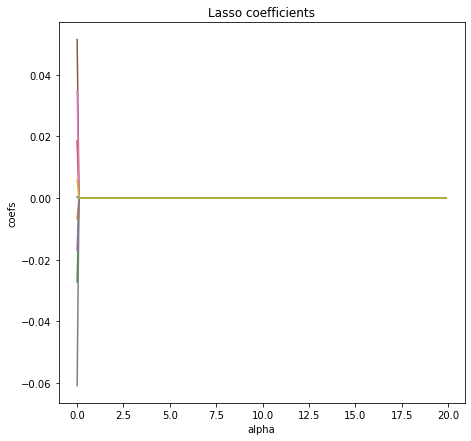

In [64]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X1_train, y1_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()


**Elastic Regression**

In [65]:
# Example 1
# ---
# Use the fair dataset from the pydataset library to predict marriage satisfaction based on the given variables.
# ---
# 
!pip install pydataset

In [66]:
# Importing our libraries
# 

from pydataset import data
import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [67]:
X2 = df2.iloc[:,1:-1].values
y2 = df2.iloc[:,-1] .values

In [68]:
# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X2,y2)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X2)))
print(first_model) 

# This mean standard error score of 0.0114 is our benchmark for determining 
# if the elastic net model will be better or worst. 

0.01141891149261875


In [69]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [70]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X2,y2)
search.best_params_
abs(search.best_score_)

0.011681334189010472

In [71]:
# The best hyperparameters was an alpha set to 0.001 and a l1_ratio of 0.8. 
# With these settings we got an MSE of 1.08. This is above our baseline model of MSE 1.05  for the baseline model. 
# Which means that elastic net is doing worse than linear regression. 
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(X2,y2)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X2)))
print(second_model)

0.01983170439321999


In conclusion we have found out elastic regression have a of 0.019831

lasso MSE of: 0.011278

linear MSE of : 0.01096

ridge regression MSE of 0.01142

Multilinear regression MSE of: 0.01191

In quantile Regression we found out the parameters for the 0.5th quantile of our y. 


Therefore Hass consulting company would recommend to use Multiple Linear Regression as our model thus allow real estate companies  to accurately predict the sale of prices upon being provided with the predictor variables. 